# timeline_plot
Use the Python3 kernel

In [6]:
import pandas as pd
import plotly.express as px

In [7]:
df = pd.read_csv('timeline-plot.csv')
df.start_date = pd.to_datetime(df.start_date)
df.end_date = pd.to_datetime(df.end_date)
# calculate midpoint time
df['time'] = df.start_date + (df.end_date - df.start_date)/2
df = df.rename(axis='columns', mapper={'damage0':'0 no damage','damage1':'1 light damage', 'damage2':'2 medium damage', 'damage3':'3 heavy damage', 'damage4':'4 dead or dying'})
df

,start_date,end_date,images,total_palms,0 no damage,1 light damage,2 medium damage,3 heavy damage,4 dead or dying,time
0,2020-09-30,2020-10-22,174944,57666,46585,6950,2549,1063,519,2020-10-11 00:00:00
1,2020-12-11,2020-12-24,882847,76088,59695,9122,4461,2341,469,2020-12-17 12:00:00
2,2021-03-03,2021-03-18,691748,67674,52202,8855,4058,2268,291,2021-03-10 12:00:00
3,2021-05-07,2021-05-20,37797,17982,14396,2259,871,402,54,2021-05-13 12:00:00
4,2021-08-23,2021-09-03,35868,12873,10131,1568,683,422,69,2021-08-28 12:00:00
5,2022-02-15,2022-02-23,23842,8656,8027,184,77,326,42,2022-02-19 00:00:00
6,2022-11-10,2022-11-28,26267,8872,8247,222,66,270,67,2022-11-19 00:00:00
7,2023-04-03,2023-04-07,22279,7913,6347,908,398,218,42,2023-04-05 00:00:00


In [8]:
df1 = df.melt(id_vars=['time', 'total_palms'], value_vars=['1 light damage', '2 medium damage', '3 heavy damage', '4 dead or dying'], var_name='damage index', value_name='n')
df1['percent of coconut palms'] = 100 * (df1['n'] / df1['total_palms'])
df1 = df1[['time', 'damage index', 'percent of coconut palms']]
df1

,time,damage index,percent of coconut palms
0,2020-10-11 00:00:00,1 light damage,12.052162
1,2020-12-17 12:00:00,1 light damage,11.988750
2,2021-03-10 12:00:00,1 light damage,13.084789
3,2021-05-13 12:00:00,1 light damage,12.562563
4,2021-08-28 12:00:00,1 light damage,12.180533
5,2022-02-19 00:00:00,1 light damage,2.125693
6,2022-11-19 00:00:00,1 light damage,2.502254
7,2023-04-05 00:00:00,1 light damage,11.474788
8,2020-10-11 00:00:00,2 medium damage,4.420282
9,2020-12-17 12:00:00,2 medium damage,5.862948


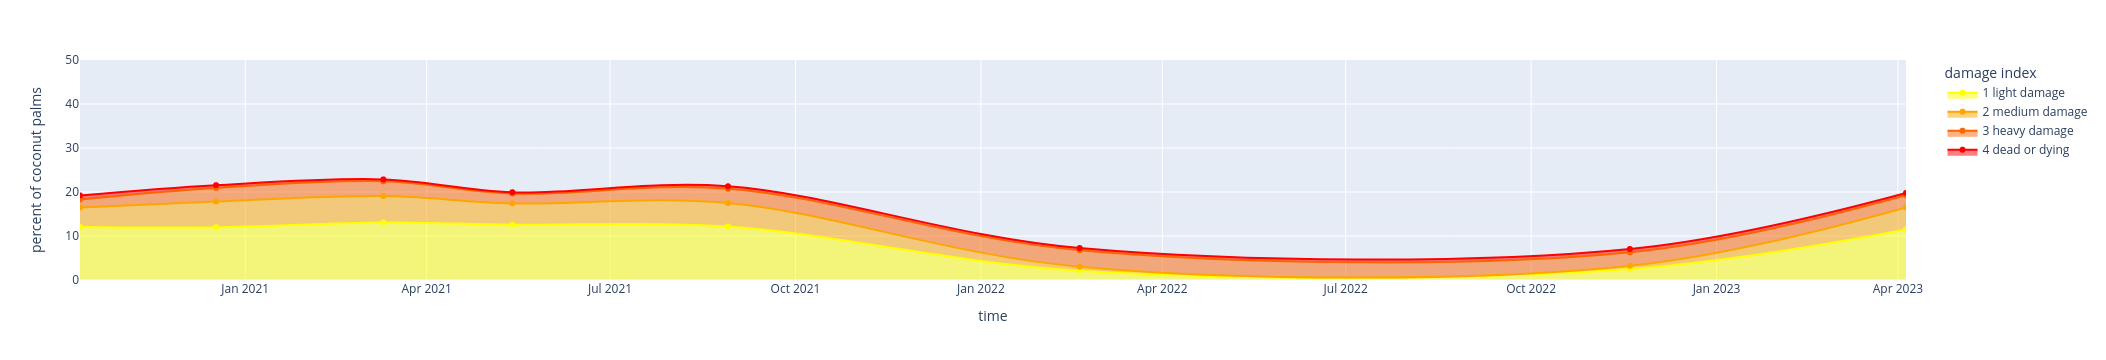

In [9]:
fig = px.area(df1, x="time", y="percent of coconut palms", color="damage index", line_shape='spline',
              color_discrete_map = {'1 light damage': '#ffff00', '2 medium damage': '#ffa500', '3 heavy damage': '#ff6400', '4 dead or dying': '#ff0000'})
fig.update_traces(mode='markers+lines')
fig.update_layout(yaxis_range=[0, 50])
fig.write_html("timeline.html")
fig.write_image("timeline.png")
fig.show()